# Week 4 - 30/10/17

(contd.)

This week we're switching to jupyter notebooks, because figures were getting a bit much.

In [1]:
from hm.analysis.explicit_tripoint import anaTP, epsChangeY, epsChangeX

This is probing the effect of using $\tilde{m_b} = \tilde{m_j} + \tilde{m_k} − T_{ij} − T{ji}$. Using $f(r_{ij}) = r_{ij}^{-\gamma}$ where $\gamma = 2$.

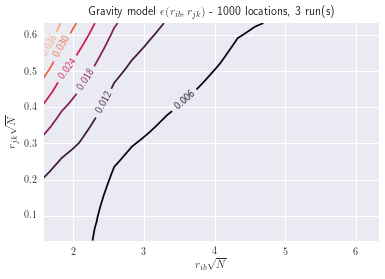

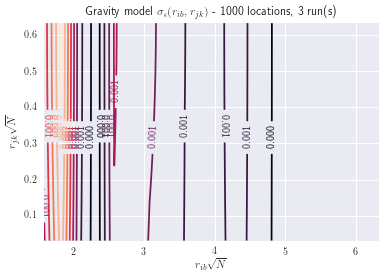

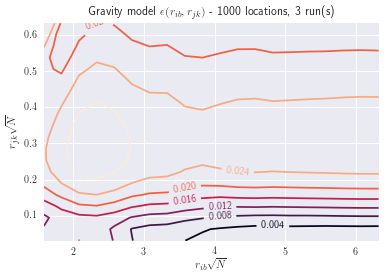

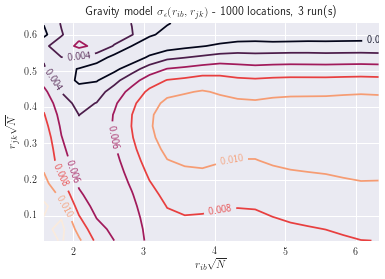

In [12]:
anaTP(0.05,0.2,0.001,0.02,20,1000, runs=3, model='gravity', ib=True, tildeM=False, heatmap=False)
anaTP(0.05,0.2,0.001,0.02,20,1000, runs=3, model='gravity', ib=True, tildeM=True, heatmap=False) # tildeM correction

**TODO** add up results from multiple different distributions and average them

# Week 5 - 6/10/17

**Main objectives:**

- Look further into the effect of different $\gamma$ on $\epsilon$ as well as using the exponential function in the gravity model

**Completed objectives:**

- Try plotting analytical solution for $\epsilon$ 
- Try incorporating the other mobility models into the explicit epsilon framework
- Average $\epsilon$ over multiple distributions
- Try putting the bars of varying $r_{ib}$ and $r_{jk}$ on the plot of locations.
- Make a contour plot for $\sigma_\epsilon(r_{ib}, r_{jk})$ to accompany $\epsilon(r_{ib}, r_{jk})$.


In [1]:
from hm.analysis.explicit_tripoint import anaTP, epsChangeY, epsChangeX

### Incorporating other mobility models

For the radiation model:

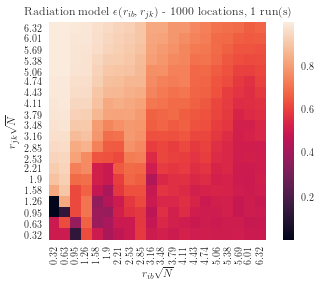

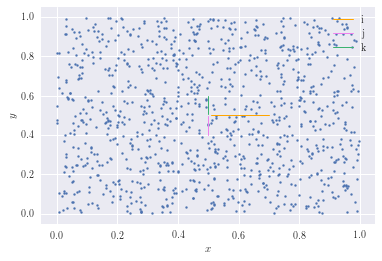

In [5]:
anaTP(0.01,0.2,0.01,0.2,20,1000, model='radiation', ib=False)

This seems to follow a similar pattern to the gravity model, with larger error at smaller $x$ and larger $y$. Interesting localisation of low error around (0.32, 0.95) - try this with more runs.

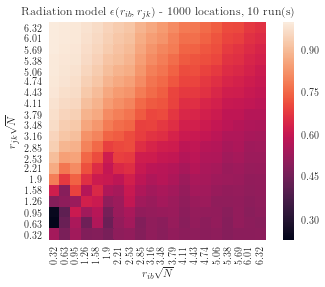

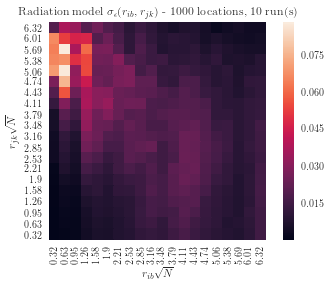

In [6]:
anaTP(0.01,0.2,0.01,0.2,20,1000, runs=10, model='radiation', ib=False)

Let's look closer at this region:

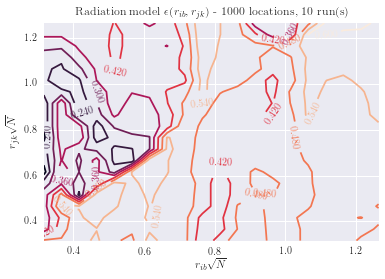

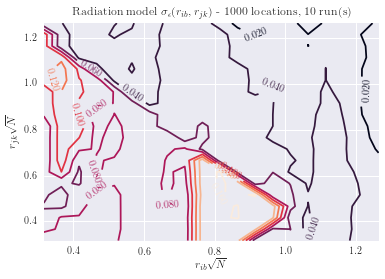

In [7]:
anaTP(0.01,0.04,0.01,0.04,20,1000, runs=10, model='radiation', ib=False, heatmap=False)

Perhaps this isn't very useful though because we wouldn't normally consider $x\sim y$, we are normally interested in $x$ a few times larger than $y$. Not really sure what to make of this either.

### Gravity model $\tilde{m_b}$ correction - now with mean $\epsilon$

Probed the small error spikes previously, but these seemed to change location (in $x$-$y$ space) each time. Now it would be good to try when averaged over a few runs. Have used 20 runs, this takes a few minutes.

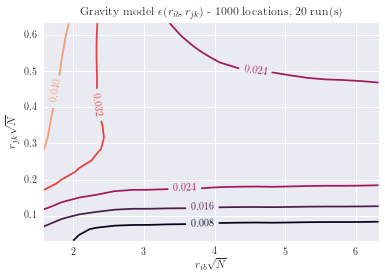

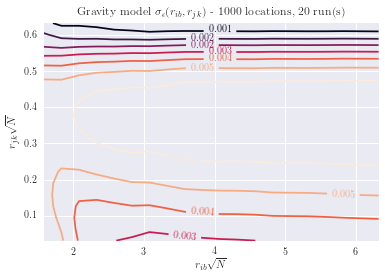

In [3]:
anaTP(0.05,0.2,0.001,0.02,20,1000, runs=20, model='gravity', ib=True, tildeM=True, heatmap=False) # tildeM correction

Don't know what to make of this, a higher error in regions of constant $r_{jk}$. 

### Analytical $\epsilon$ results

Need to find an analytical expression for $\epsilon$ using the exponential distance function in the gravity model,

$$f(r_{ij}) = e^{-\gamma r_{ij}}$$

The analytical result we found for $\epsilon$:

$$\epsilon(r_{ib},r_{jk}) = 1 - \bigg(\frac{m_j + m_k}{m_b}\bigg)\bigg(1-\frac{arctan(\frac{r_{jk}}{2r_{ib}})}{\pi}\bigg)e^{\gamma (r_{ib} - \sqrt{r_{ib}^2 + \frac{r_{jk}}{2}^2})},$$

This simulation uses the exponential form of $f(r_{ij})$ above. This seemed to give a good preliminary fit. Not sure whether this $\gamma$ value is arbitrary or not though - the fit seems to change with this.

For the $\epsilon$ change in $x$ (for $\gamma=2$):

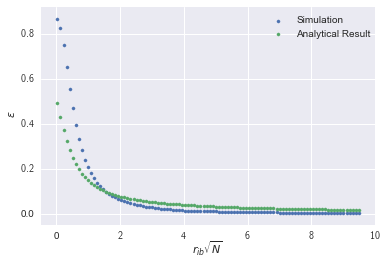

In [2]:
epsChangeX(0.001,0.3, 0.03, 100, 1000, ib=True, analytical=True)

For the change of $\epsilon$ in $y$:

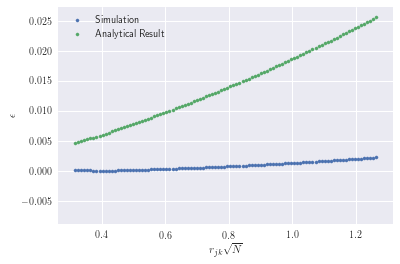

In [3]:
epsChangeY(0.01,0.04, 0.4, 100, 1000, ib=True, analytical=True)

The latter only vaguely holds for small $y$ (that is $y \ll x$?), this makes sense, as this was an assumption made in the derivation.

Now going to see if a contour plot of the analytical result looks vaguely similar.

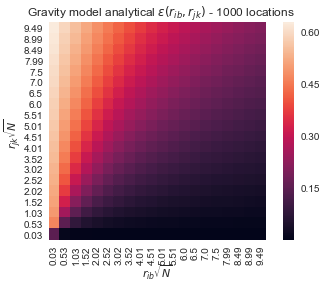

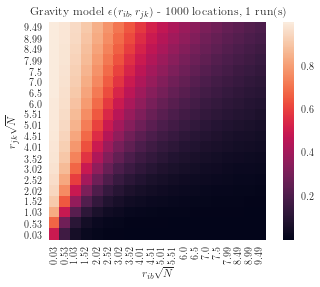

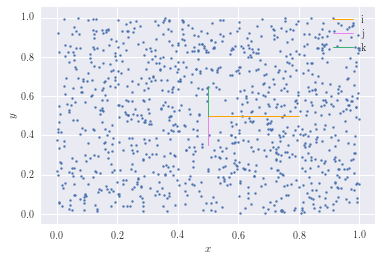

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from hm.analysis.explicit_tripoint import anlyt_epsilon

xmin, xmax, ymin, ymax = 0.001, 0.3, 0.001, 0.3
n = 20
N = 1000

x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)

xy = np.array(np.meshgrid(x, y)).T # 2D Sample Space
xy = np.swapaxes(xy,0,1)

epsVals = np.zeros((len(xy),len(xy), 1)) # create empty array for epsilon

for j, row in enumerate(xy): # fill sample space
    for i, pair in enumerate(row):
        epsVals[j][i][0] = abs(anlyt_epsilon(pair[0], pair[1], gamma=2))
        
meanEps = np.mean(epsVals, axis=2)
meanEps = np.flip(meanEps, 0) # make the y axis ascend
        
xticks = np.around(x*np.sqrt(N), 2)
yticks = np.flip(np.around(y*np.sqrt(N), 2), 0) # make the y axis ascend
        
ax = sns.heatmap(meanEps, xticklabels=xticks, yticklabels=yticks, square=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax.set_xlabel(r'$r_{ib} \sqrt{N}$')
ax.set_ylabel(r'$r_{jk} \sqrt{N}$')

ax.set_title('Gravity model analytical ' + r'$\epsilon(r_{ib},r_{jk})$' + ' - ' + str(N) + ' locations')

# Plot the simulated result
anaTP(xmin, xmax, ymin, ymax, n, N)

Doesn't look *too* dissimilar in terms of shape, the absolute absolute $\epsilon$ values are wrong though, as we expect from the 2D plots.

### Location change of $j$ and $k$

Realised that I was also varying the absolute position of $j$ and $k$ *as well as* $i$ (in order to keep the locations all centred around the middle of the distribution). This is undesirable as the location distribution around $j$ and $k$ will change (too many variables!). Have modified it so that $j$ and $k$ remain at the centre and the location of $i$ changes (this could change my results considerably? Let's see). 

Also added lines to show how the locations of the points are changed with respect to the location distribution.

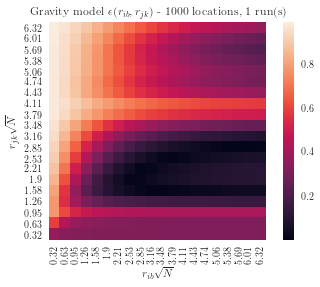

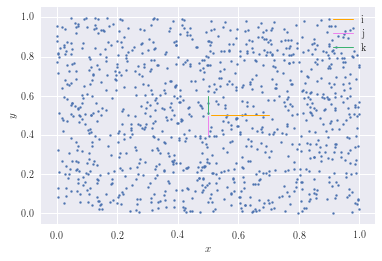

In [5]:
anaTP(0.01,0.2,0.01,0.2,20,1000, model='gravity', ib=False)

Ok, this is interesting, it looks different from before. Now try with a few runs on the new $\sigma_{\epsilon}(r_{ib},r_{jk})$ plot I've made.

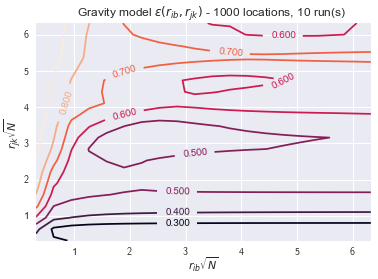

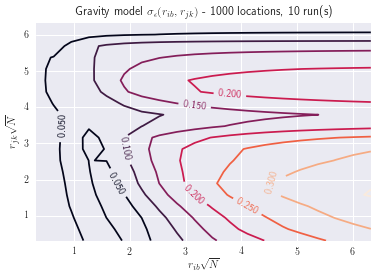

In [3]:
anaTP(0.01,0.2,0.01,0.2,20,1000, runs=10, model='gravity', ib=False, heatmap=False)

The more random fluctuations of before are now gone, leaving the high $\epsilon$ at constant values of $r_{jk}$. Quite large errors though. Why is this?

## Ideas

- Need to remember that there are in fact $N+3$ and $N+2$ locations in the tri-point and two-point distributions respectively.